# AirBnB "Listings" Dataset for New York City

##    

## 1. Business Understanding

The travel accommodation website airbnb.com is a crowd-sourced marketplace where hosts living in various cities across the globe can offer rooms or entire apartments/houses/condos to visitors of their respective city at various rates and number of nights. The data that airbnb has collected and made publicly available primarily revolve around an individual listing as well as review information for the specific listing. The attributes airbnb has captured within their dataset allows users of the data to identify and even predict certain trends based on the information provided within the listings as well as the user-sourced review information for either the host or the liting itself. Because of its size, the team will be currently focused on the city of New York with the potential to include other cities for future assignments for more advanced analysis.

From a prediction perspective, there are several avenues the team could possibly focus on. For example, a classification analysis can be performed (specifically Linear Discriminatory Analysis) focused on an individual host and whether or no the host can be considered "popular" or "unpopular" based on several attributes, including but not limited to: average reviews per month, calculated number of host listings, number of reviews and price. Other predictive analyses that can be performed include mulitple linear regression with price as the response variable and utilizing both categorical and continuous features in order to predict what the average price should be for that particular listing. Features to use in the analysis would be: neighborhood, neighborhood group, room type, availability, and reviews per month.

From a utility perspective, providing an algorithm in order to predict a price as well as the popularity of a hosts' listing could provide an additional layer to users of the site to make better decisions around selecting a host to contact for future accommodations. A succesful linear regression model can display the predicted price based on the variables for a given listing and compare it to the actual listing price, which could potentially open up a more competitive landscape for the company at large and can be used in all other cities based on the model provided for the New York City dataset.


#### Importing the primary files and converting them into a pandas DataFrame

In [3]:
# import the modules as well as the primary files to load into DataFrames
import pandas as pd
import numpy as np

In [5]:
# listNYC = pd.read_csv('airbnb_listings_NYC.csv') # read in the "listings" csv

The .csv files above that have been read into the Notebook will be used for several of the analyses moving forward. Anytime listNYC is used as the dataframe, it is referring to this source, which has removed specific outliers which is further detailed below.

#### Adding code to ensure "matplotlib" plots can be embedded into the Jupyter notebook

In [32]:
# this code snippet allows plots to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#### Adding code to include seaborn visualizations

In [33]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(color_codes=True)

## 2. Data and Attribute/Feature Description

Description of attributes for ListNYC dataset

In [34]:
listNYC_descriptions = pd.read_csv('listNYC_dataset_description.csv') 
listNYC_descriptions

,Attributes,Attribute Type,Description,Used in Analysis
0,id,Nominal,Unique ID of property listed on Airbnb,Yes
1,name,Text,Name of the property,No
2,host_id,Nominal,Unique ID of host who has listed the property,No
3,host_name,Text,Name of the host to,No
4,neighbourhood_group,Nominal / Categorical,City/Town as maintained by muncipalty. It help...,Yes
5,neighbourhood,Nominal / Categorical,Actual neighbourhood where property is located,Yes
6,latitude,Interval,Latitude on the map where property is located,TBD
7,longitude,Interval,Longitude on the map where property is located,TBD
8,room_type,Nominal / Categorical,"Category as Private or Shared Room, Entire home",Yes
9,price,Ratio,Price per day for renting the property,Yes


Description of attributes for reviewsNYC dataset

In [35]:
reviewsNYC_descriptions = pd.read_csv('reviewsNYC_dataset_description.csv') 
reviewsNYC_descriptions

,Attributes,Attribute Type,Description,Used in Analysis
0,listing_id,Nominal,Id of property being listed referring to the I...,TBD
1,id,Nominal,Unique ID of the review,TBD
2,date,Interval,Date when review was submitted,TBD
3,reviewer_id,Nominal,ID of reviewer,TBD
4,reviewer_name,Text,Reviewer Name,TBD
5,comments,Text,Comment/Review posted for specific property by...,TBD


## 3. Data Verification and Quality

In [36]:
print listNYC_full.info()
print listNYC.info()
print listNYC_full.price.sum() #total income if 100% of AirBNB used in NYC per day
print listNYC.price.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32575 entries, 0 to 32574
Data columns (total 16 columns):
id                                32575 non-null int64
name                              32574 non-null object
host_id                           32575 non-null int64
host_name                         32570 non-null object
neighbourhood_group               32575 non-null object
neighbourhood                     32575 non-null object
latitude                          32575 non-null float64
longitude                         32575 non-null float64
room_type                         32575 non-null object
price                             32575 non-null int64
minimum_nights                    32575 non-null int64
number_of_reviews                 32575 non-null int64
last_review                       25087 non-null object
reviews_per_month                 25087 non-null float64
calculated_host_listings_count    32575 non-null int64
availability_365                  32575 non-null int64

After removing properties priced over 2000 was completed, the dataset yieled 32,546 rows of information, i.e. a removal of 29 properties. The average price per night decreased from 150.79 to 146.98 (a difference of 3.81; enough for approximately one cup of coffee up in New York City).  Additionally, removing the outlier high priced properties lowered the Standard Deviation from 195.20 to 134.85, decreasing the Standard Deviation almost 30%.

Even with the removal of data, the minimum nights requirement essentially stayed the same with just over three nights minimum required.  Same could be said about availability over the course of the year; it stayed at just over 166 nights per year that the property was available.  

If travelling to New York on a budget, a traveler could rent a "property" for as little as 10 per night in a cozy room in Harlem.  The only two 10 properties were either a "luggage hold" (how nice of them) or an hourly rest.  If money is of no concern, a traveller has 17 properties to choose from at 2000 per night.  All of the top end properties are located either in Brooklyn or Manhattan and four of the 17 properties are a private room while the remaining 13 are the entire property.  

Diving into the largest hypothetical of hypotheticals, if every property on AirBNB for New York City was occupied, that would mean the city would be missing out on $4,911,888 of taxable revenue for the full dataset and 4,783,559 of taxable revenue for the reduced data set.  Going further, if every property was occupied the average of 166 nights per night, that would be 815,373,408 in taxable revenue lost for the full data set and 794,070,794 for the reduced data set.  No wonder cities are fighting AirBNB!!!

## 4. Statistics Summary for Appropriate Features

In [37]:
listNYC_full = pd.read_csv('listings_full.csv') # read in the csv of the full data
listNYC = pd.read_csv('airbnb_listings_NYC.csv') #data reduced csv
print listNYC_full.describe()
print listNYC.describe()

                    id          host_id      latitude     longitude  \
count     32575.000000     32575.000000  32575.000000  32575.000000   
mean    6301867.160767  18570026.126662     40.731900    -73.959615   
std     3672161.763746  17871440.937699      0.052153      0.038137   
min        2515.000000       283.000000     40.499794    -74.240843   
25%     3227804.000000   3594927.500000     40.694079    -73.986135   
50%     6692975.000000  11631535.000000     40.726134    -73.960683   
75%     9447878.500000  30296819.000000     40.763778    -73.942580   
max    12806558.000000  69782291.000000     40.912316    -73.726984   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  32575.000000    32575.000000       32575.000000       25087.000000   
mean     150.787045        3.297928          13.816577           1.245806   
std      195.196415       11.478926          25.055395           1.271110   
min       10.000000        1.000000           0.0000

The only columns with missing data were number_of_reviews, last_review and reviews_per_month.  This occurred because there were properties that did not have any reviews.  For this lab, the reviews were not a focus and therefore the lack of reviews did not affect the analysis below.

The full dataset includes 32,575 rows of information.  When analyzing the data, there were 29 instances where the price per night exceeded 2000 per night.  These instances were not mistakes as a search of the New York City area for properties over 2000 per night yielded more than zero search results (this data set was produced prior to the search being conducted; the search was made to confirm that such properties could exist).  This alone skewed the visual components below and were removed from the data.  

Additionally, through the describe function, we can see that every column of information has the full amount of rows of information, i.e. 32,575 and 32,546 after removal of the greater than 2000 per night outliers.

## 5. Primary Attribute Visualization

Dividing data into groups so visualization can be presented for each type of group

In [38]:
#Defining data into group as continuous, ordinal and category to use later
continuous_features = ['price','latitude','longitude','reviews_per_month','calculated_host_listings_count','number_of_reviews']
ordinal_features = ['minimum_nights','availability_365']
categ_features = ['neighbourhood_group','neighbourhood','room_type']

For categorical variables, following table represent high level information 

In [39]:
listNYC[categ_features].describe()

,neighbourhood_group,neighbourhood,room_type
count,32546,32546,32546
unique,5,210,3
top,Manhattan,Williamsburg,Entire home/apt
freq,16585,2574,17051


From the table above it is clear that Manhattan is the top neighbourhood_group associated with listed properties. Similarly room_type as 'Entire home/apt' is the most commonly listed property type.

Since Manahattan came out as the top neighbourhood_group, we can see some more detail about different neighbourhoods in this group.

In [40]:
listNYC_Manhattan = listNYC[(listNYC.neighbourhood_group == 'Manhattan')]
listNYC_Manhattan_ngrouped = listNYC_Manhattan.groupby(by=['neighbourhood'])

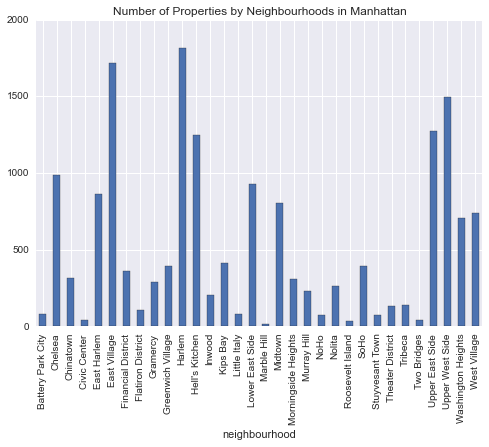

In [41]:
listNYC_Manhattan_ngrouped.id.count().plot(kind='bar', title='Number of Properties by Neighbourhoods in Manhattan') 

Since Williamsburg has come on top of the list of neighbourhoods with most properties listed, we will summarize the room_type data for Williamsburg.

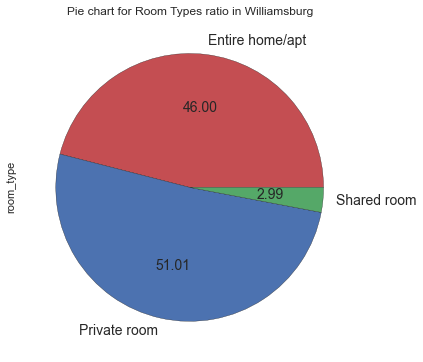

In [42]:
listNYC_Williamsburg = listNYC[(listNYC.neighbourhood == 'Williamsburg')]
listNYC_Williamsburg_rgrouped = listNYC_Williamsburg.groupby(by=['room_type'])
room_types = listNYC_Williamsburg.room_type.unique()
listNYC_Williamsburg_rgrouped.room_type.count().plot.pie(labels=room_types
                                                         ,colors=['r','b','g']
                                                         ,autopct='%.2f'
                                                         ,fontsize=14
                                                         ,figsize=(6,6)
                                                         ,title='Pie chart for Room Types ratio in Williamsburg' )

Now we will review some ordinal data: minimum night requirement <= 30 days.

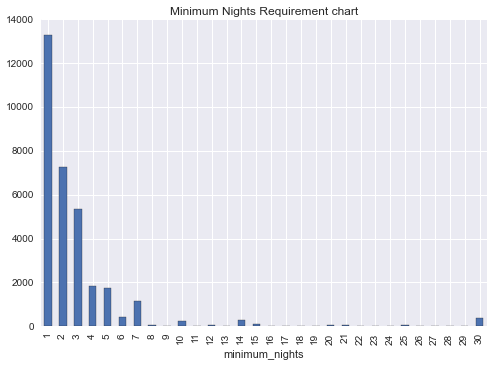

In [43]:
listNYC_Min_Nights = listNYC[(listNYC.minimum_nights <= 30)].groupby(by=['minimum_nights'])
listNYC_Min_Nights.minimum_nights.count().plot(kind='bar', title='Minimum Nights Requirement chart')

From the chart 'Minimum Night Requirement' it is evident that most properties are available for 1 night minimum night requirement. However, there are also properties with weekly, bi-weekly and monthly minimum night requirement.

For continuous variables, lets review ratio between host and listed property as group of properites listed by same host/owner

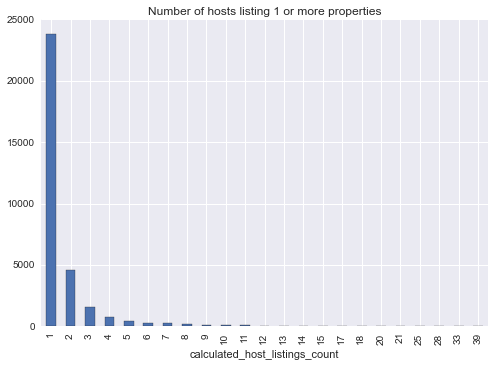

In [44]:
listNYC_hosts_group = listNYC.groupby(by=['calculated_host_listings_count'])
listNYC_hosts_group.id.count().plot(kind='bar',title='Number of hosts listing 1 or more properties ')

From the chart 'Number of hosts listing 1 or more properties' , it is obvious that most of the hosts have only one property listed on AirBnN. However there are some hosts with listed properties as many as 39. I assume that hosts with higher number of properties are agents/brokers who are renting multiple properties.

For market share of each neighbourhood_group, lets compare property listed in each neighbourhood_group

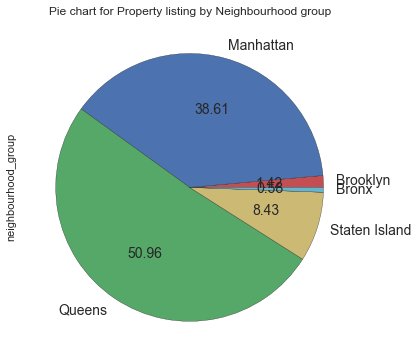

In [45]:
listNYC_ng_grouped = listNYC.groupby(by=['neighbourhood_group'])
ng_names = listNYC.neighbourhood_group.unique()
listNYC_ng_grouped.neighbourhood_group.count().plot.pie(labels=ng_names
                                                         ,colors=['r','b','g','y','c']
                                                         ,autopct='%.2f'
                                                         ,fontsize=14
                                                         ,figsize=(6,6)
                                                         ,title='Pie chart for Property listing by Neighbourhood group' )

Now analyze the price data.

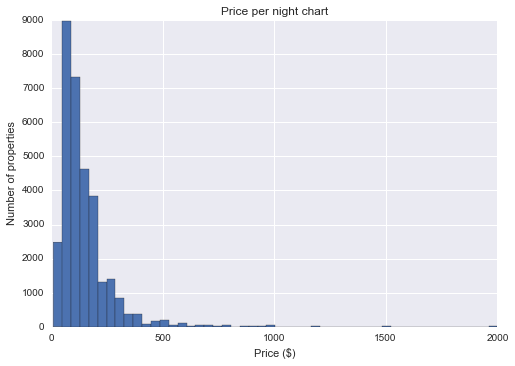

In [46]:
price_plot = listNYC['price'].hist(bins=50)
price_plot.set_title('Price per night chart')
price_plot.set_xlabel('Price ($)')
price_plot.set_ylabel('Number of properties')

It is evident that the there are some outliers in regards to price. Lets take out any record with price > 1000

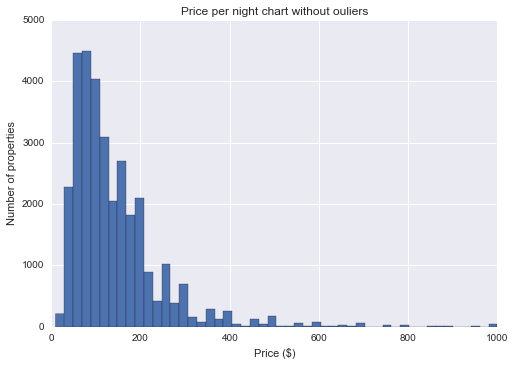

In [47]:
listNYC_wo_price_outliers = listNYC[(listNYC.price <= 1000)]
price_plot = listNYC_wo_price_outliers['price'].hist(bins=50)
price_plot.set_title('Price per night chart without ouliers')
price_plot.set_xlabel('Price ($)')
price_plot.set_ylabel('Number of properties')

From the price chart above, it is evident that most of the properties have nightly rate between 0 and 200 US Dollars.

## 6. Attribute Relationships and Visualizations

#### Scatter Plot of Price vs. Number of Reviews

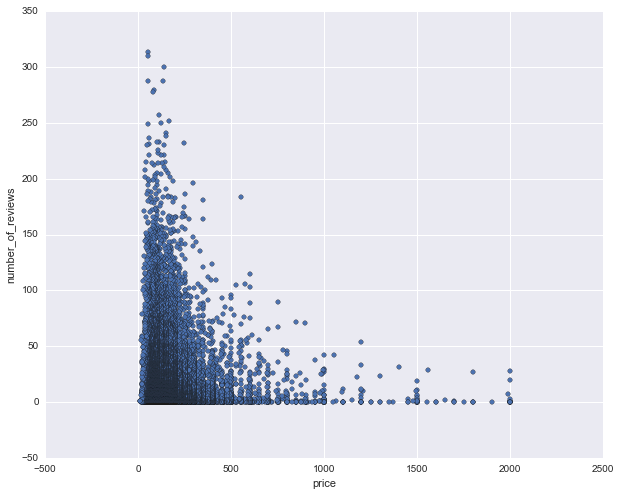

In [48]:
#scatter plot that observes the price of a listings vs. the number of reviews that listing has
listNYC.plot.scatter('price', 'number_of_reviews', s=None, c=None, figsize=(10,8))

At initial glance to the scatter plot above, it appears that the amount of reviews have more to do with the amount of listings that are in specific price ranges as opposed to the price of the listings alone. For example, even though there are limited listings that exceed $1,000, a decent portion of them have a review count that are greater than lower-priced listings. However, there are several higher-priced listings that have no reviews at all.

Furthermore, from a distribution standpoint, the vast majority of reviews occur at a price point of of $400 or less and a review count of less than 150, displaying a very sharp right-skewed scatter plot.

#### Create a new DataFrame that removes the IDs in order to focus on relationships between all other features

In [9]:
listNYC_noID = listNYC[['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','calculated_host_listings_count']]

#### Create a scatterplot matrix that focuses on the features in the new DataFrame

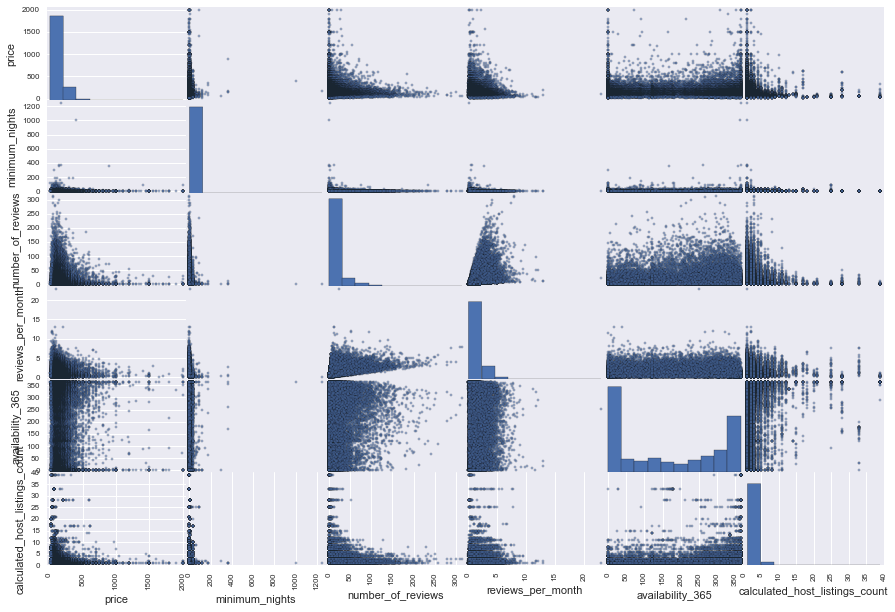

In [17]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(listNYC_noID,figsize=(15, 10))


Even though it was determined below that most of the relationships between certain variables can be considered "not significant", there are several interesting relationships worth discussing from the scatter matrix plot above.

When observing price specifically to other variables, it seems to have almost no effect on the availability of the listing on an annual basis (365 days), with the distribution not really increasing at all until it reaches approximately 250 days on average. Furthermore, a handful of inexpensive listings have hosts with more than 15 total listings; however, the higher the prices increase the less amount of overall listings a host tends to have.

#### Convert the above scatter matrix into a correlation plot using seaborn

/Users/pherrin/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/pherrin/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/pherrin/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


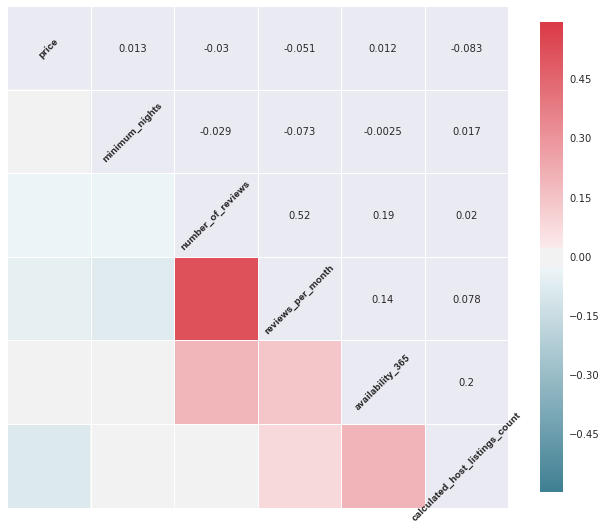

In [16]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.corrplot(listNYC_noID, 
             annot=True, # plot numeric annotations?
             sig_stars=True, # plot significance?
             diag_names=True, 
             cmap=cmap, 
             ax=ax)
f.tight_layout()

based on the visualization above, even though there seem to be some correlations between certain features, none of the relationships end up being considered "statisitically significant."  The only correlation that comes close is the Number of Reviews and the average number of Reviews Per Month, which makes sense because the stats being utilized have to do with review counts. 

Aside from the previously mentioned correlation, no other relations acquired a correlation greater than 0.2 (Availability 365 and the Calcualted Host Listings count). In terms of other features, surprisingly price seems to have little to no correlation with any of the other features, thus potentially showing that if a user is willing to pay the price for the listing, their reviews are based on the experience as opposed to how much the price was.

## 7. Target Classification Relationships

In terms of determining what would be likely targets for this dataset, the primary ones that initially come to mind are being able to classify what type of room the listing is or which burrough the listing is in (based on other variables without using the latitude and longitude of the listing in order to see if there are possible relationships based on the listings' nominal differences. The below visualizations begin to share some of the relationships between those categories and specific variables.

#### Create a cross-tab that looks at the count of listings by neighborhood group and the room type

In [23]:
RoomType_Hood = pd.crosstab(listNYC.neighbourhood_group, listNYC.room_type)
RoomType_Hood

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,139,289,34
Brooklyn,5931,6273,363
Manhattan,9927,6150,508
Queens,985,1620,138
Staten Island,69,118,2


#### Visualize the crosstab data into a vertical bar chart

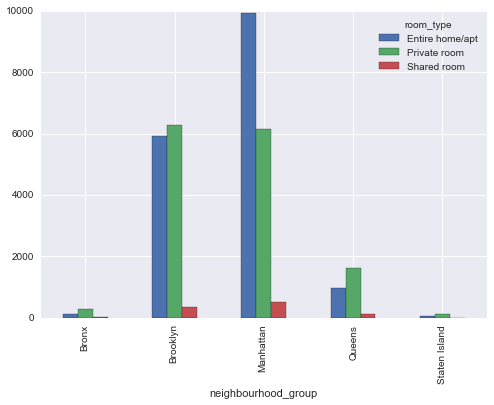

In [25]:
RoomType_Hood.plot(kind='bar')

Based on the bar chart above, it is by far no surprise that a majority of the listings are within the Manhattan burrough of NYC, with Brookyln not far off as the second-most listed burrough. That being said, Manhattan is surprisingly the only burrough where the room types offered are different versus all other burroughs; in Manhattan the number of entire home/apartment listings far exceeds the number of private or shared rooms, where all other burroughs the private room is the room type with the most amount of listings.

#### Create  a box plot of "reviews per month" broken our by neighborhood group

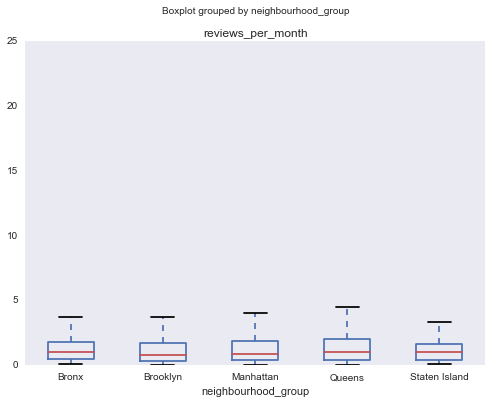

In [29]:
listNYC.boxplot(column='reviews_per_month', 
                by='neighbourhood_group', ax=None, fontsize=None, rot=0, 
                grid=False, figsize=(8,6), layout=None, return_type=None)

If we were to use Neighborhood Group as a possible classification, the number of reviews a listing receives is at first glance not all too telling. The main items however that do stand out slightly are as follows:

1. Queens seems to have a longer "upper whisker" spread compared to all other burroughs and their median number appears to be slightly higher than all others as well.

2. All burroughs except Staten Island (and likely due to the overall number of reviews) have medians that are closer to the lower-end of the distribution, showing that it truly takes a certain strategy in order to receive more reviews on average.

#### Create a box plot of all prices broken out by neighborhood group (burrough)

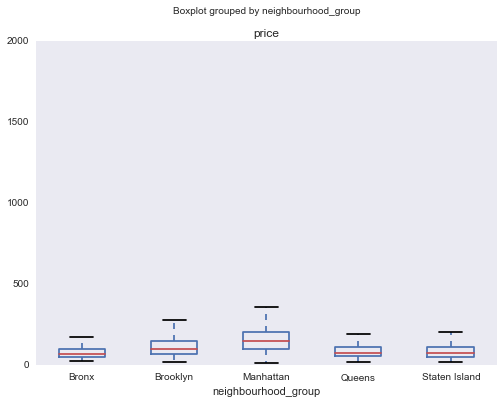

In [26]:
listNYC.boxplot(column='price', by='neighbourhood_group', ax=None, fontsize=None, rot=0, grid=False, figsize=(8,6), layout=None, return_type=None)

The shortness of these box plots primarily goes to show that once you reach a certain price point, not only do the listings become sparse but the range between the actual prices increases as well. However, 95% of all listings tend to be lower than approximately $400. 

In terms of comparing price ranges between burroughs, Queens, Bronx and Staten Island share similar distributions, while Brooklyn's price distribution seems to lie between those three burroughs and Manhattan, whose distribution is the most widepsread of the burroughs.

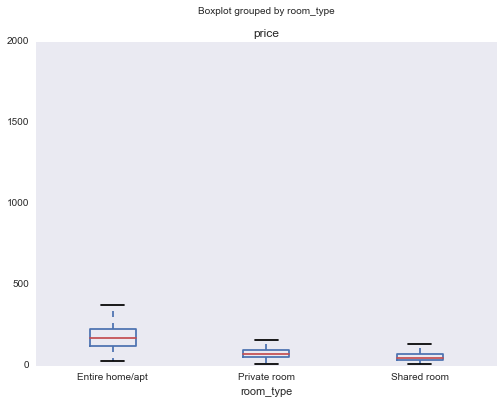

In [30]:
listNYC.boxplot(column='price', by='room_type', ax=None, fontsize=None, 
                rot=0, grid=False, figsize=(8,6), layout=None, return_type=None)

Of the box plots created thus far, this visualization seems to be the most telling but makes sense overall. Based on how much quare footage a host is willing to provide you largely depicts the type of room and its respective price. If a host is offering the entire home or apartment, the average price is considerably higher vs. a private or shared room. The differences between a shared or private are not as discernable; however, the median price for a shared room is lower than the median price for a private room.

## 8. Feature/Attribute Additions to Current Dataset

For future analysis, we have considered adding other cities into the dataset in order to perform comparative analyses between major destination cities. For example, including cities such as San Francisco, Chicago, Austin and Los Angeles could be added and compare the same variables to one another.

A feature that would be helpful to have within the dataset on the rating/review side would be more of a numerical or ordinal value that would coincide along with a user's overall review. That way, future analysis that would focus on classification or LDA would be potentially easier to produce an algorithm that is stronger than one without.

## 9. Additional/Exceptional Workspace

/Users/pherrin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


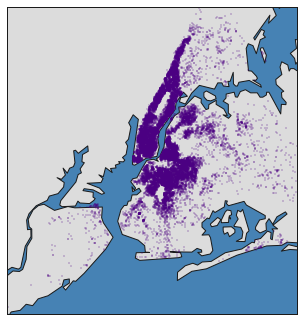

In [22]:
from mpl_toolkits.basemap import Basemap
mapping = np.genfromtxt ("map.csv",
                         delimiter=',',
                         dtype=[('lat', np.float32), ('lon', np.float32)],
                         usecols=(0, 1))
fig = plt.figure()

themap = Basemap(projection='merc',
              llcrnrlon = -74.240843,              # lower-left corner longitude
              llcrnrlat = 40.499794,               # lower-left corner latitude
              urcrnrlon = -73.726984,               # upper-right corner longitude
              urcrnrlat = 40.912316,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 1,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

x, y = themap(mapping['lon'], mapping['lat'])
themap.plot(x, y,
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=1            # marker size
            )

plt.show()

Based on the above image as well as all the previous analyses performed, the obvious attraction in visiting New York City is being as close to the center as possible. WIth Manhattan being the largest of the burroughs, it is no surprise that this area is the most dense, particularly because the vast majority of tourist-related activities occur in Manhattan.

Furthermore, the map also shows that people may be and likely are willing to be slightly farther away from downtown Manhattan in order to save some money. THe average listing for Queens or Brookyln may be an average of $50 less than the listing in Manhattan, while transportation into the city via mass transit is only a few dollars a day.

Understanding the layout of the listings from this view will provide the team with more cases to consider the precise location when determining items such as price in future adavanced analyses.